# Analyze the Results
We've cleaned the data and trained a K Means model on that data. Now it's time to explore the results.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.axes as axes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Read DataFrame from pickle object
df = pd.read_pickle("./saved-items/labeled.pkl")

df.head()

,Num_children,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,labels
0,0,58138,635,88,546,172,88,88,1617,2
1,2,46344,11,1,6,2,1,6,27,0
2,0,71613,426,49,127,111,21,42,776,1
3,1,26646,11,4,20,10,3,5,53,0
4,1,58293,173,43,118,46,27,15,422,1


## Size of the Clusters
Generally speaking, we're looking for clusters of similar sizes  

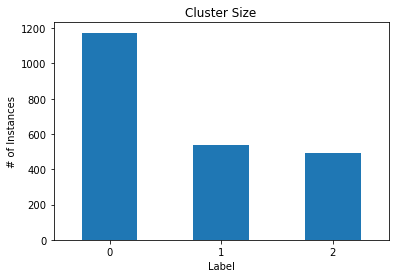

In [3]:
# Bar graph of total instances in each label
fig = df.labels.value_counts().plot.bar()
axes.Axes.tick_params(fig, labelrotation=0)  # Set axes to horizontal

# Chart titles
plt.title('Cluster Size')
plt.xlabel('Label')
plt.ylabel('# of Instances')

plt.show()

In [4]:
# Get top 5 Pearson's coefficient
top_features = df.corr()['labels'].sort_values(ascending=False)[1:6].copy()

# Get the feature names
top_cols = top_features.index

top_features

Total     0.907922
Income    0.809050
Meat      0.789440
Wines     0.750172
Fish      0.724939
Name: labels, dtype: float64

In [5]:
top_df = df[['Total', 'Income', 'Meat', 'Wines', 'Fish', 'labels']].copy()

# Divide DataFrame
Create three smaller DataFrames; one for each label.

In [6]:
# Group 0
label0 = top_df[top_df['labels'] == 0].copy()
label0.drop(columns=['labels'], inplace=True)
label0.reset_index(inplace=True, drop=True)

# Group 1
label1 = top_df[top_df['labels'] == 1].copy()
label1.drop(columns=['labels'], inplace=True)
label1.reset_index(inplace=True, drop=True)

# Group 2
label2 = top_df[top_df['labels'] == 2].copy()
label2.drop(columns=['labels'], inplace=True)
label2.reset_index(inplace=True, drop=True)

In [7]:
label0.describe()

,Total,Income,Meat,Wines,Fish
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,134.417376,36232.798126,29.601363,67.324532,8.189097
std,129.342700,12727.878116,32.385643,88.793809,12.887209
min,5.000000,1730.000000,0.000000,0.000000,0.000000
25%,42.250000,27100.000000,8.000000,9.000000,2.000000
50%,75.000000,36425.500000,17.000000,27.000000,4.000000
75%,197.250000,45578.250000,38.750000,88.750000,11.000000
max,595.000000,70844.000000,217.000000,516.000000,150.000000


In [8]:
label1.describe()

,Total,Income,Meat,Wines,Fish
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,851.821229,63039.093110,186.294227,506.962756,34.595903
std,291.831219,10967.238927,143.604138,280.332942,34.783534
min,277.000000,2447.000000,3.000000,1.000000,0.000000
25%,615.000000,56559.000000,94.000000,293.000000,10.000000
50%,819.000000,62845.000000,149.000000,478.000000,23.000000
75%,1038.000000,69508.000000,238.000000,656.000000,52.000000
max,1829.000000,113734.000000,1725.000000,1462.000000,188.000000


In [9]:
label2.describe()

,Total,Income,Meat,Wines,Fish
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,1468.520408,75909.848980,467.338776,658.081633,111.514286
std,388.441036,10413.687668,228.606679,320.821315,64.355899
min,449.000000,31907.000000,64.000000,33.000000,0.000000
25%,1170.000000,70046.250000,282.000000,398.000000,58.250000
50%,1457.500000,76504.500000,430.000000,605.500000,103.500000
75%,1722.000000,82343.500000,628.000000,900.500000,160.000000
max,2525.000000,105471.000000,984.000000,1493.000000,259.000000


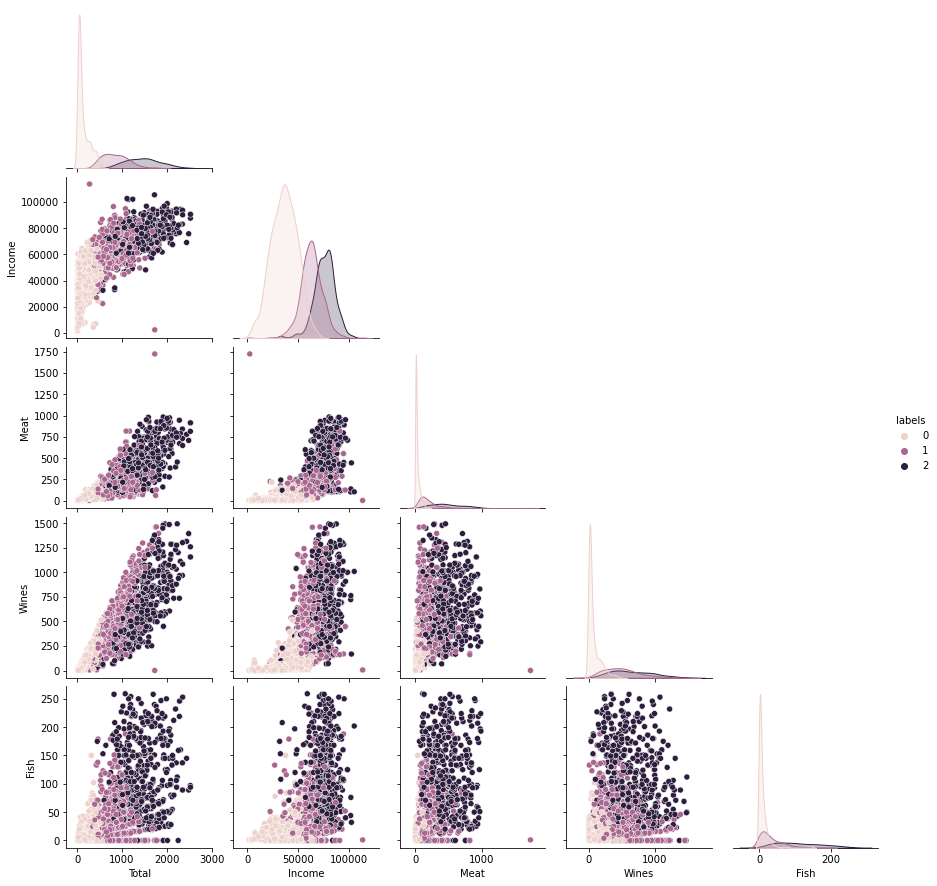

In [10]:
sns.pairplot(top_df, hue='labels', corner=True)
plt.show()

# Initial Findings
- Unbalanced 
    - label 0 is as much as labels 1 and 2 combined
- Distinct clusters
    - it seems like the clusters are separated as low, medium, and high

In [18]:
# sns.histplot(data=top_df, hue='labels')

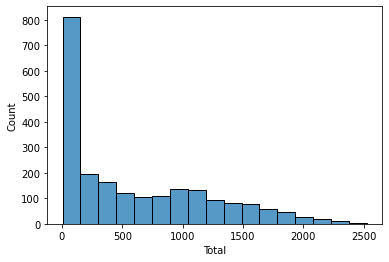

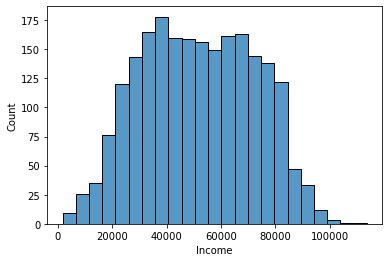

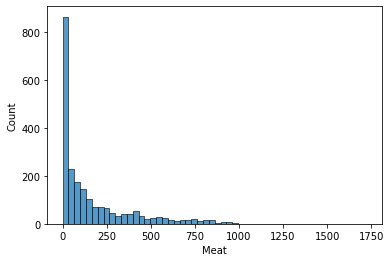

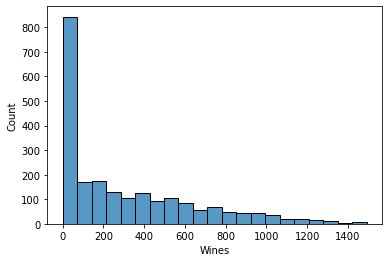

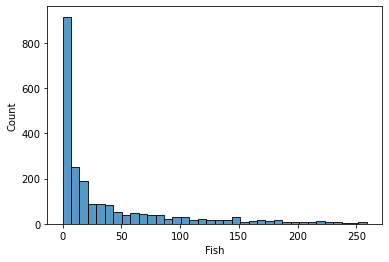

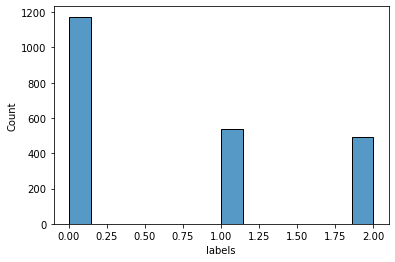

In [14]:
# Histogram
for col in top_df.columns:
    sns.histplot(top_df[col])
    plt.show()

In [13]:
top_df.head()

,Total,Income,Meat,Wines,Fish,labels
0,1617,58138,546,635,172,2
1,27,46344,6,11,2,0
2,776,71613,127,426,111,1
3,53,26646,20,11,10,0
4,422,58293,118,173,46,1


# TODO
- Scale the data with `MinMaxScaler`
- Check out each histogram in greater detail
    - Use **Plotly** to make the graph interactive